In [20]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#if IN_COLAB:
#    !pip install zfit
import math
from pylab import figure, cm
from scipy import integrate, stats

# PDF and cumulative distribution

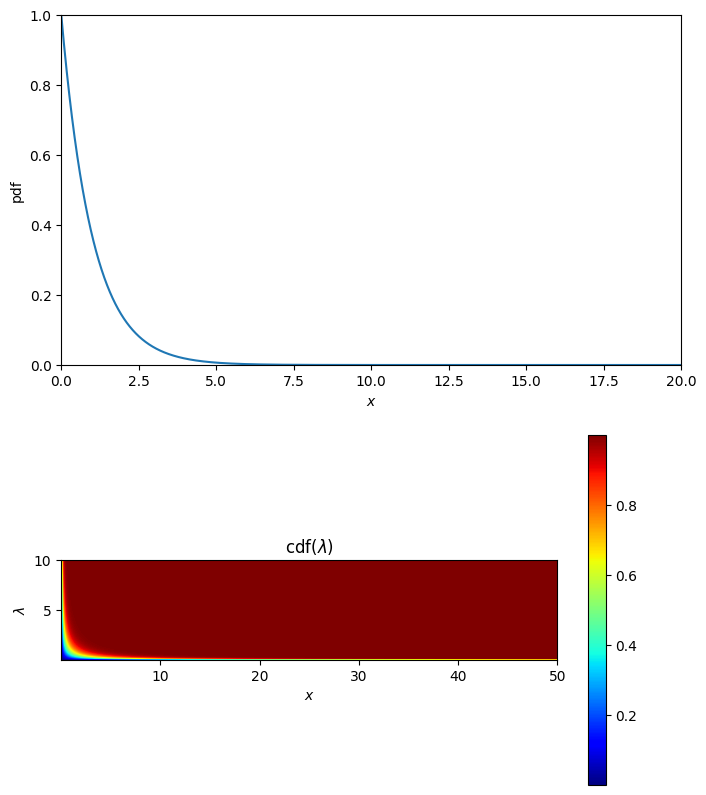

In [3]:
lambda_sim = 1
x = np.logspace(-40, 13, num=20000, base=np.e/2)
x_lin = np.linspace(0.0001,50,1000)
l = np.linspace(0.0001,10.0001,500)
x_1, l_1 = np.meshgrid(x, l)
l_2, x_2 = np.meshgrid(l, x)

pdf = lambda_sim*np.exp(-x*lambda_sim)
pdf_lambda = l_1*np.exp(-x_1*l_1)
like_2D = l_2*np.exp(-x_2*l_2)

cdf_lambda = np.empty([len(l),len(x)], np.double)
cdf_lambda_lin = np.empty([len(l),len(x_lin)], np.double)

for slices in l_1:
    cdf_lambda[np.where(l_1 == slices)[0][0], :] = integrate.cumtrapz(pdf_lambda[np.where(l_1 == slices)[0][0], :], x, initial=0)
    cdf_lambda_lin[np.where(l_1 == slices)[0][0], :] = np.interp(x_lin, x, cdf_lambda[np.where(l_1 == slices)[0][0], :])
    
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.xlim(0, 20)
plt.ylim(0, lambda_sim)
plt.plot(x, pdf)

plt.subplot(2, 1, 2)
plt.xlabel("$x$")
plt.ylabel("$\lambda$")
plt.title("cdf($\lambda$)")
plt.imshow(cdf_lambda_lin,extent=[np.min(x_lin),np.max(x_lin),np.min(l),np.max(l)], cmap=cm.jet, origin='lower')
plt.colorbar()
plt.show()

# Sampling and ordering

In [28]:
df = pd.DataFrame({'x':np.random.exponential(scale= 1, size=100)})
df['pdf'] = np.exp(-df['x'])
df['mle'] = 1./df['x']
df['loglikeratio'] = np.log(df['pdf']) - np.log(df['mle'])

print(df.to_string(index=False))

print('\nDecreasing order')
sorted_df = df.sort_values(by=['x'], ascending=False)
print(sorted_df[-5:].to_string(index=False))

print('\nIncreasing order')
sorted_df = df.sort_values(by=['x'], ascending=True)
print(sorted_df[-5:].to_string(index=False))

print('\nProbability order')
sorted_df = df.sort_values(by=['pdf'], ascending=False)
print(sorted_df[-5:].to_string(index=False))

print('\nLogLike ratio order')
sorted_df = df.sort_values(by=['loglikeratio'], ascending=False)
print(sorted_df[-5:].to_string(index=False))

       x      pdf       mle  loglikeratio
3.555837 0.028557  0.281228     -2.287247
0.162425 0.850080  6.156677     -1.979962
0.252523 0.776838  3.960031     -1.628775
4.926433 0.007252  0.202987     -3.331817
1.567172 0.208634  0.638092     -1.117899
0.140490 0.868933  7.117954     -2.103110
0.116095 0.890390  8.613609     -2.269439
0.141942 0.867672  7.045135     -2.094279
0.895970 0.408211  1.116109     -1.005818
0.079768 0.923331 12.536425     -2.608406
1.565751 0.208931  0.638671     -1.117386
1.923797 0.146051  0.519805     -1.269496
0.026712 0.973641 37.435692     -3.649337
0.041007 0.959823 24.386265     -3.235027
0.930993 0.394162  1.074122     -1.002496
1.787286 0.167414  0.559507     -1.206588
1.759319 0.172162  0.568402     -1.194392
0.077611 0.925324 12.884709     -2.633653
0.107821 0.897788  9.274613     -2.335102
1.373967 0.253101  0.727820     -1.056265
0.865886 0.420679  1.154887     -1.009888
1.791954 0.166634  0.558050     -1.208647
0.603593 0.546843  1.656746     -1

# Upper limit (increasing ordering)

For every $\lambda$ need to impose
$$
\int_0^{x_{max}}\textrm{pdf}(x;\lambda)dx= CL
$$

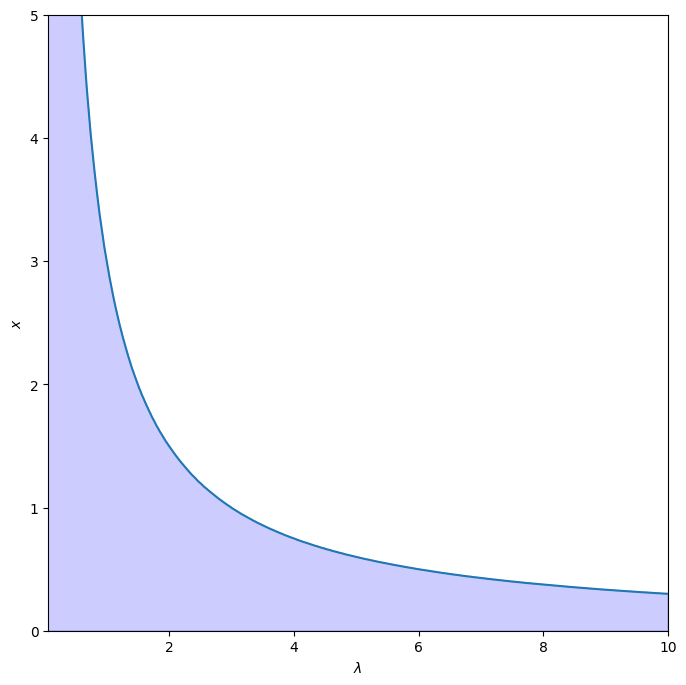

In [4]:
CL = 95/100 #95%
accuracy_level1 = 0.00005 #(CL ± 0.005)%
accuracy_level2 = 0.0002  #(CL ± 0.020)%
accuracy_level3 = 0.001   #(CL ± 0.100)%

def getDecOrdCL(par, CL):
    xmax = np.empty([len(l)], float)
    for slices in par[3:]:
        current_parpos = np.where(par == slices)[0][0]
        try:
            xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - CL) < accuracy_level1)[0][0]
        except:
            try:
                xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - CL) < accuracy_level2)[0][0]
            except:
                try:
                    xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - CL) < accuracy_level3)[0][0]
                except:
                    print('Empty CL')
        xmax[current_parpos] = x[xpos]
    return xmax
    
x_max_upper = getDecOrdCL(l_1, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(l[3], np.max(l))
plt.ylim(0, 5)
plt.plot(l, x_max_upper)

plt.fill_between(
        x = l, 
        y1 = x_max_upper,
        color = "b",
        alpha = 0.2)
        
plt.show()

# Lower limit (decreasing ordering)
For every $\lambda$ need to impose
$$
\int_{x_{min}}^{+\infty}\textrm{pdf}(x;\lambda)dx= CL
$$

Empty CL


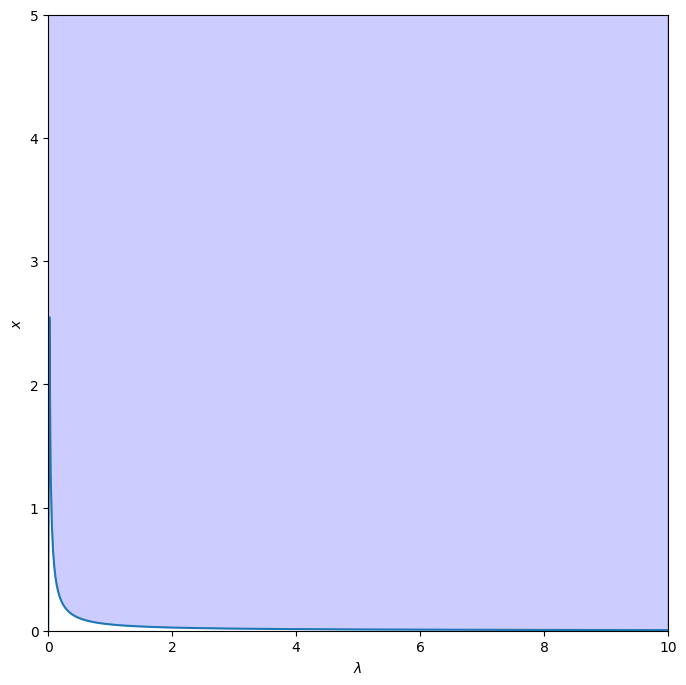

In [5]:
CL = 95/100 #95%
accuracy_level1 = 0.00005 #(CL ± 0.005)%
accuracy_level2 = 0.0002  #(CL ± 0.020)%
accuracy_level3 = 0.001   #(CL ± 0.100)%

def getIncOrdCL(par, CL):
    xmin = np.empty([len(l)], float)
    for slices in par:
        current_parpos = np.where(par == slices)[0][0]
        try:
            xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - (1 - CL)) < accuracy_level1)[0][0]
            xmin[current_parpos] = x[xpos]
        except:
            try:
                xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - (1 - CL)) < accuracy_level2)[0][0]
                xmin[current_parpos] = x[xpos]
            except:
                try:
                    xpos = np.where(np.abs(cdf_lambda[current_parpos, :] - (1 - CL)) < accuracy_level3)[0][0]
                    xmin[current_parpos] = x[xpos]
                except:
                    print('Empty CL')
    return xmin
    
x_min_lower = getIncOrdCL(l_1, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(0, np.max(l))
plt.ylim(0, 5)
plt.plot(l, x_min_lower)

plt.fill_between(
        x = l, 
        y1 = x_min_lower,
        y2 = np.max(x),
        color = "b",
        alpha = 0.2)
        
plt.show()

# Feldman-Cousins intervals (LR ordering) [UNSTABLE]

Need to find for every $\lambda$ 
$$
\int_{x_{min}}^{x_{max}}\textrm{pdf}(x;\lambda)dx= CL \quad\textrm{     satisfying      }\quad \Lambda({x_{min}|\lambda})=\Lambda({x_{max}|\lambda}),
$$
where $\Lambda(\lambda,x)$ is the LogLikelihood ratio.

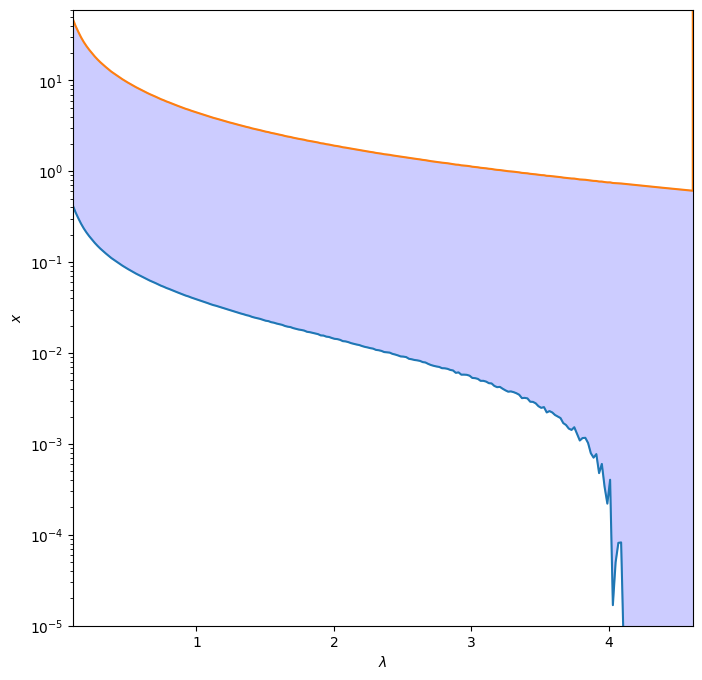

In [152]:
CL = 95./100 #95%
accuracy_level1 = 0.000005
accuracy_level2 = 0.0002
accuracy_level3 = 0.005
accuracy_level4 = 0.01

def numpy_combinations(x):
   
    idx = np.stack(np.triu_indices(len(x), k=1), axis=-1)

    return x[idx]

def computeLogLR(obs, like2D):
    LR = np.empty([len(x),len(l)], float)
    for slices in obs:
        LR[np.where(obs == slices)[0][0], :] = np.log(like2D[np.where(obs == slices)[0][0], :]) - np.log(np.max(like2D[np.where(obs == slices)[0][0], :]))
    return LR

def getLROrdCL(LR_2D, par, obs, CL):
    xmin_arr = np.empty([len(l)], float)
    xmax_arr = np.empty([len(l)], float)
    for slices in par[5:230]:
        current_parpos = np.where(par == slices)[0][0]
        print(f'Slice lambda = {l[np.where(par == slices)[0][0]]:.3f}')
        #plt.figure(figsize=(8, 8))
        #plt.ylim(-5, 0)
        #plt.plot(x, LR_2D[:, current_parpos])
        #plt.show()
        xmin_pos = []
        xmax_pos = []
        diff_integral_l = []
        found = False
        for value_LR in reversed(LR_2D[:, current_parpos]):
            if (value_LR==0 and not(found)):
                print(f'No interval found for {current_parpos}')
                break
            x_limits = np.where(np.abs(LR_2D[:, current_parpos] - value_LR) < accuracy_level3)[0]
            x_pairs = list(itertools.combinations(x_limits, r=2))
            max_pos = np.where(LR_2D[:, current_parpos] == max(LR_2D[:, current_parpos]))[0][0]
            x_pairs[:] = [pair for pair in x_pairs if ((pair[0] - max_pos) * (pair[1] - max_pos)<0)]
            x_pairs = np.array(x_pairs)
            if(len(x_pairs) == 0):
                continue
            integral_area = cdf_lambda[current_parpos, x_pairs[:,1]] - cdf_lambda[current_parpos, x_pairs[:,0]]
            diff_integral = np.abs(integral_area - CL)
            right_pairpos = np.where(diff_integral == np.min(diff_integral))[0][0]
            if (abs(diff_integral[right_pairpos]) > accuracy_level4):
                continue
            else:
                found = True
            xmin_pos.append(x_pairs[right_pairpos][0])
            xmax_pos.append(x_pairs[right_pairpos][1])
            diff_integral_l.append(np.abs(cdf_lambda[current_parpos, xmax_pos[-1]] -\
                                                   cdf_lambda[current_parpos, xmin_pos[-1]] - CL))
            if (len(np.array(diff_integral_l))>2):
                if (np.array(diff_integral_l)[-1]>np.array(diff_integral_l)[-2]):
                    break
        if (found):
            min_diff_idx = np.argmin(np.array(diff_integral_l))
            LR_difference = LR_2D[xmax_pos[min_diff_idx], current_parpos] - LR_2D[xmin_pos[min_diff_idx], current_parpos]
            integral = cdf_lambda[current_parpos, xmax_pos[min_diff_idx]] - cdf_lambda[current_parpos, xmin_pos[min_diff_idx]]
            xmin_arr[current_parpos] = obs[xmin_pos[min_diff_idx]]
            xmax_arr[current_parpos] = obs[xmax_pos[min_diff_idx]]
            print(f'xmin:{obs[xmin_pos[min_diff_idx]]:.3f}\txmax:{obs[xmax_pos[min_diff_idx]]:.3f}\tIntegral:{integral:.6f}\tLR_equal:{LR_difference:4f}')          
            
    return xmin_arr, xmax_arr

#loglike_ratio = computeLogLR(x_2, like_2D)
#x_min, x_max = getLROrdCL(loglike_ratio, l_1, x, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(l[5], l[230])
plt.ylim(0.00001, 60)
#plt.xscale('log')
plt.yscale('log')
plt.plot(l, x_min)
plt.plot(l, x_max)

plt.fill_between(
        x = l, 
        y1 = x_min,
        y2 = x_max,
        color = "b",
        alpha = 0.2)
        
plt.show()

# Feldman-Cousins intervals (LR ordering) [via Toy - STABLE]

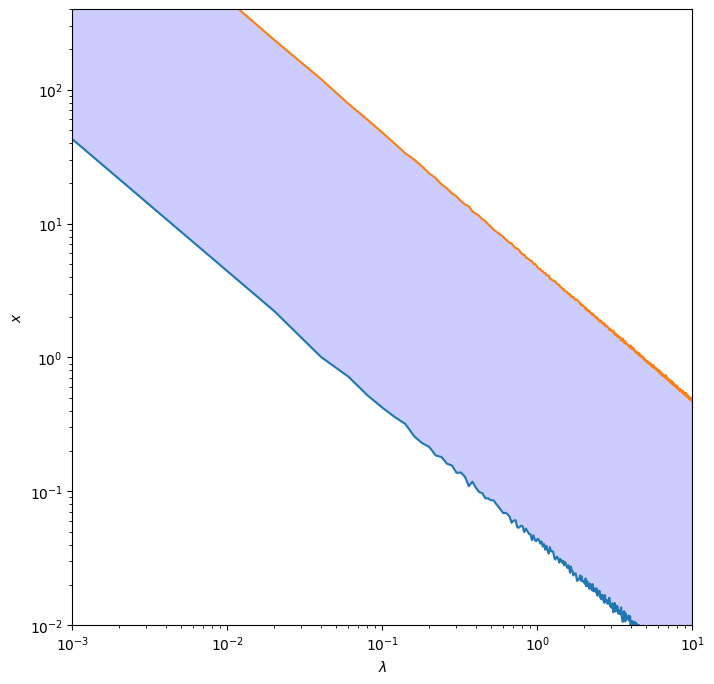

In [19]:
CL = 95./100 #95%
accuracy_level1 = 0.000005
accuracy_level2 = 0.0002
accuracy_level3 = 0.005
accuracy_level4 = 0.01


def getLROrdCL(par, obs, CL):
    xmin_arr = np.empty([len(l)], float)
    xmax_arr = np.empty([len(l)], float)
    for slices in par:
        current_parpos = np.where(par == slices)[0][0]
        current_lambda = l[current_parpos]
        #print(f'Slice lambda = {current_lambda:.3f}')
        sample = np.random.exponential(scale=1./current_lambda, size=10000)
        lratio = np.log(current_lambda*np.exp(-current_lambda*sample)) - np.log(np.exp(-1)/sample)
        new_order = np.lexsort([sample, lratio])
        sample = np.flip(sample[new_order])
        lratio = np.flip(lratio[new_order])
        endpos = int(lratio.size*CL)
        critical_value = sample[endpos]
        found=False
        shift=1
        while(not found):
            critical_value2 = sample[endpos+shift]
            if ((critical_value - sample[0])*(critical_value2 - sample[0]) < 0):
                found = True
            else:
                if (shift>0):
                    shift = -shift
                else:
                    shift = -shift + 1
        if ((critical_value - sample[0])>0):
            xmax = critical_value
            xmin = critical_value2
        else:
            xmin = critical_value
            xmax = critical_value2
        xmin_arr[current_parpos] = xmin
        xmax_arr[current_parpos] = xmax
        
    return xmin_arr, xmax_arr


#x_min, x_max = getLROrdCL(l_1, x, CL)

plt.figure(figsize=(8, 8))
plt.xlabel("$\lambda$")
plt.ylabel("$x$")
plt.xlim(0.001, 10)
plt.ylim(0.01, 400)
plt.xscale('log')
plt.yscale('log')
plt.plot(l, x_min)
plt.plot(l, x_max)

plt.fill_between(
        x = l, 
        y1 = x_min,
        y2 = x_max,
        color = "b",
        alpha = 0.2)
        
plt.show()

# Coverage (upper limit)

In [15]:
def compute_upper_limit(val, upper_band, par):
    min_distance = np.abs(np.array(upper_band - val))
    return par[np.argmin(min_distance)]

iterations = 20000

count_1 = 0.
count_2 = 0.
count_3 = 0.

for n in range(iterations):
    val1 = np.random.exponential(1/1)
    val2 = np.random.exponential(1/0.5)
    val3 = np.random.exponential(1/4)
    
    upper_lambda_1 = compute_upper_limit(val1, x_max_upper, l)
    upper_lambda_2 = compute_upper_limit(val2, x_max_upper, l)
    upper_lambda_3 = compute_upper_limit(val3, x_max_upper, l)
    
    if (val3>np.max(x_max_upper[3:])):
        upper_lambda_3=np.nan
        
    if (val1>np.max(x_max_upper[3:])):
        upper_lambda_1=np.nan
        
    if (val2>np.max(x_max_upper[3:])):
        upper_lambda_2=np.nan
    
    if (val3<np.min(x_max_upper[3:])):
        upper_lambda_3=10
        #print('low')
    if (val1<np.min(x_max_upper[3:])):
        upper_lambda_1=10
        
    if (val2<np.min(x_max_upper[3:])):
        upper_lambda_2=10 

        
        

    if(upper_lambda_1 > 1):
        count_1 += 1
    
    if(upper_lambda_2 > 0.5):
        count_2 += 1
        
    if(upper_lambda_3 > 4):
        count_3 += 1

coverage_1 = count_1/iterations
coverage_2 = count_2/iterations
coverage_3 = count_3/iterations

print(f'Coverage for lambda=1: {coverage_1*100:.2f}%')
print(f'Coverage for lambda=0.5: {coverage_2*100:.2f}%')
print(f'Coverage for lambda=4: {coverage_3*100:.2f}%')

Coverage for lambda=1: 95.28%
Coverage for lambda=0.5: 95.32%
Coverage for lambda=4: 94.99%


# Coverage (lower limit)

In [16]:
def compute_lower_limit(val, lower_band, par):
    min_distance = np.abs(np.array(lower_band - val))
    return par[np.argmin(min_distance)]

iterations = 10000

count_1 = 0.
count_2 = 0.
count_3 = 0.

for n in range(iterations):
    val1 = np.random.exponential(1/1)
    val2 = np.random.exponential(1/0.5)
    val3 = np.random.exponential(1/4)
    
    lower_lambda_1 = compute_lower_limit(val1, x_min_lower, l)
    lower_lambda_2 = compute_lower_limit(val2, x_min_lower, l)
    lower_lambda_3 = compute_lower_limit(val3, x_min_lower, l)
    
    if (val3>np.max(x_min_lower)):
        lower_lambda_3=0
        
    if (val1>np.max(x_min_lower)):
        lower_lambda_1=0
        
    if (val2>np.max(x_min_lower)):
        lower_lambda_2=0
    
    if (val3<np.min(x_min_lower)):
        lower_lambda_3=np.nan
        #print('low')
    if (val1<np.min(x_min_lower)):
        lower_lambda_1=np.nan
        
    if (val2<np.min(x_min_lower)):
        lower_lambda_2=np.nan
        

    if(lower_lambda_1 < 1):
        count_1 += 1
    
    if(lower_lambda_2 < 0.5):
        count_2 += 1
        
    if(lower_lambda_3 < 4):
        count_3 += 1

coverage_1 = count_1/iterations
coverage_2 = count_2/iterations
coverage_3 = count_3/iterations

print(f'Coverage for lambda=1: {coverage_1*100:.2f}%')
print(f'Coverage for lambda=0.5: {coverage_2*100:.2f}%')
print(f'Coverage for lambda=4: {coverage_3*100:.2f}%')

Coverage for lambda=1: 95.22%
Coverage for lambda=0.5: 95.17%
Coverage for lambda=4: 96.36%


# Coverage (Feldman-Cousins)

In [17]:
iterations = 10000

count_1 = 0.
count_2 = 0.
count_3 = 0.

for n in range(iterations):
    val1 = np.random.exponential(1/1)
    val2 = np.random.exponential(1/0.5)
    val3 = np.random.exponential(1/4)
    
    lower_lambda_1 = compute_lower_limit(val1, x_min, l)
    lower_lambda_2 = compute_lower_limit(val2, x_min, l)
    lower_lambda_3 = compute_lower_limit(val3, x_min, l)
    
    if (val3>np.max(x_min[5:230])):
        lower_lambda_3=0
        
    if (val1>np.max(x_min[5:230])):
        lower_lambda_1=0
        
    if (val2>np.max(x_min[5:230])):
        lower_lambda_2=0
    
    if (val3<np.min(x_min[5:230])):
        lower_lambda_3=5
        #print('low')
    if (val1<np.min(x_min[5:230])):
        lower_lambda_1=5
        
    if (val2<np.min(x_min[5:230])):
        lower_lambda_2=5

        
    upper_lambda_1 = compute_upper_limit(val1, x_max, l)
    upper_lambda_2 = compute_upper_limit(val2, x_max, l)
    upper_lambda_3 = compute_upper_limit(val3, x_max, l)
    
    if (val3>np.max(x_max[5:230])):
        upper_lambda_3=0
        
    if (val1>np.max(x_max[5:230])):
        upper_lambda_1=0
        
    if (val2>np.max(x_max[5:230])):
        upper_lambda_2=0
    
    if (val3<np.min(x_max[5:230])):
        upper_lambda_3=5
        #print('low')
    if (val1<np.min(x_max[5:230])):
        upper_lambda_1=5
        
    if (val2<np.min(x_max[5:230])):
        upper_lambda_2=5
        

    if(lower_lambda_1 < 1 and upper_lambda_1 > 1):
        count_1 += 1
    
    if(lower_lambda_2 < 0.5 and upper_lambda_2 > 0.5):
        count_2 += 1
        
    if(lower_lambda_3 < 4 and upper_lambda_3 > 4):
        count_3 += 1

coverage_1 = count_1/iterations
coverage_2 = count_2/iterations
coverage_3 = count_3/iterations

print(f'Coverage for lambda=1: {coverage_1*100:.2f}%')
print(f'Coverage for lambda=0.5: {coverage_2*100:.2f}%')
print(f'Coverage for lambda=4: {coverage_3*100:.2f}%')

Coverage for lambda=1: 94.23%
Coverage for lambda=0.5: 94.95%
Coverage for lambda=4: 95.00%


# Asymptotic limit (Wilk's theorem)

Given the Likelihood ratio
$$
\Lambda(\theta) = \frac{\mathcal{L}(\theta|x)}{\mathcal{L}(\hat{\theta}|x)}
$$

Wilk's theorem states that for sufficently large samples
$$
-2\log\Lambda(\theta)\sim \chi^2_k,
$$

with $k$ being the degree of freedom (difference of free parameters between numerator and denominator, in our case $k=1$).

Given a given CL then the interval is found as the set of values where teh parameter satisfy:
$$
-2\log\Lambda(\theta)\leq \chi^2_{1,CL}
$$

where $\chi^2_{1,1-CL}$ is the CL-quantile for the $\chi^2$ distribution, with 1 degree of freedom.

In [18]:
chi_threshold = stats.chi2.ppf(0.95, 1)
for lambda_coverage in [1, 0.5, 4,]:
    count = 0
    for n in range(iterations):
        sample = np.random.exponential(scale=1./lambda_coverage, size=40)
        sample_size = sample.size
        x_pos = [np.argmin(np.abs(x - s)) for s in sample]
        mean = np.mean(sample)
        chi_test = -2*(np.sum([np.log(like_2D[pos, :]) for pos in x_pos], axis=0)-(-sample_size*np.log(mean)-sample_size))
        interval = np.where(chi_test <= chi_threshold)[0]
        try:
            interval[0]
        except:
            interval = np.array([0, 0])
        #print(f'Lower: {l[interval[0]]:.2f} Upper:{l[interval[-1]]:.2f}')
        if (l[interval[0]] <= lambda_coverage and l[interval[-1]] >= lambda_coverage):
            count += 1

    coverage = count/iterations
    print(f'Coverage for lambda={lambda_coverage}: {coverage*100:.2f}%')

Coverage for lambda=1: 94.11%
Coverage for lambda=0.5: 93.09%
Coverage for lambda=4: 94.76%
